In [ ]:
!pip install -q tensorflow
!pip install -q keras

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Training and validation data folders path
train_data_dir = "/content/drive/MyDrive/Dataset/Train Dataset"
validation_data_dir = "/content/drive/MyDrive/Dataset/Validation Set"

# Image dimensions
img_width, img_height = 224, 224

# Number of classes
num_classes = 14

In [ ]:
# Use ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create training and validation data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,  # Adjust batch size based on your GPU memory
    class_mode="categorical"
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode="categorical"
)

Found 11286 images belonging to 14 classes.
Found 1167 images belonging to 14 classes.


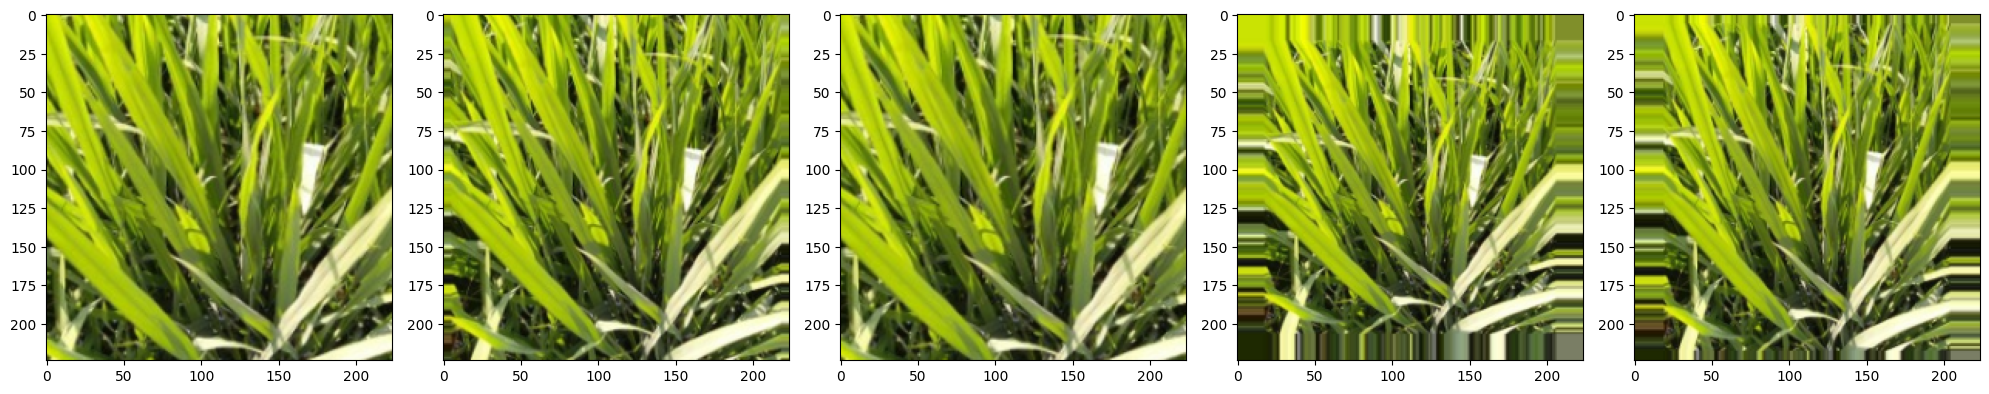

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

# Ploting a few training images
img_array = [train_generator[0][0][0] for i in range(5)]
plotImages(img_array)

In [ ]:
# Loading the pre-trained DenseNet121 model
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the pre-trained layers for transfer learning
base_model.trainable = False

# Custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation="softmax")(x)

In [ ]:
# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compiling the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Model training
EPOCHS=20
history=model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=EPOCHS,
    validation_data=validation_generator, validation_steps=len(validation_generator)
)

Epoch 1/20
353/353 [==============================] - 532s 1s/step - loss: 0.5699 - accuracy: 0.8133 - val_loss: 0.6047 - val_accuracy: 0.8183
Epoch 2/20
353/353 [==============================] - 262s 741ms/step - loss: 0.3040 - accuracy: 0.9001 - val_loss: 0.4959 - val_accuracy: 0.8543
Epoch 3/20
353/353 [==============================] - 257s 726ms/step - loss: 0.2226 - accuracy: 0.9250 - val_loss: 0.4356 - val_accuracy: 0.8612
Epoch 4/20
353/353 [==============================] - 252s 713ms/step - loss: 0.1889 - accuracy: 0.9321 - val_loss: 0.3479 - val_accuracy: 0.8972
Epoch 5/20
353/353 [==============================] - 251s 711ms/step - loss: 0.1710 - accuracy: 0.9422 - val_loss: 0.3893 - val_accuracy: 0.8955
Epoch 6/20
353/353 [==============================] - 255s 722ms/step - loss: 0.1449 - accuracy: 0.9506 - val_loss: 0.3904 - val_accuracy: 0.8929
Epoch 7/20
353/353 [==============================] - 252s 713ms/step - loss: 0.1529 - accuracy: 0.9477 - val_loss: 0.4206 - va

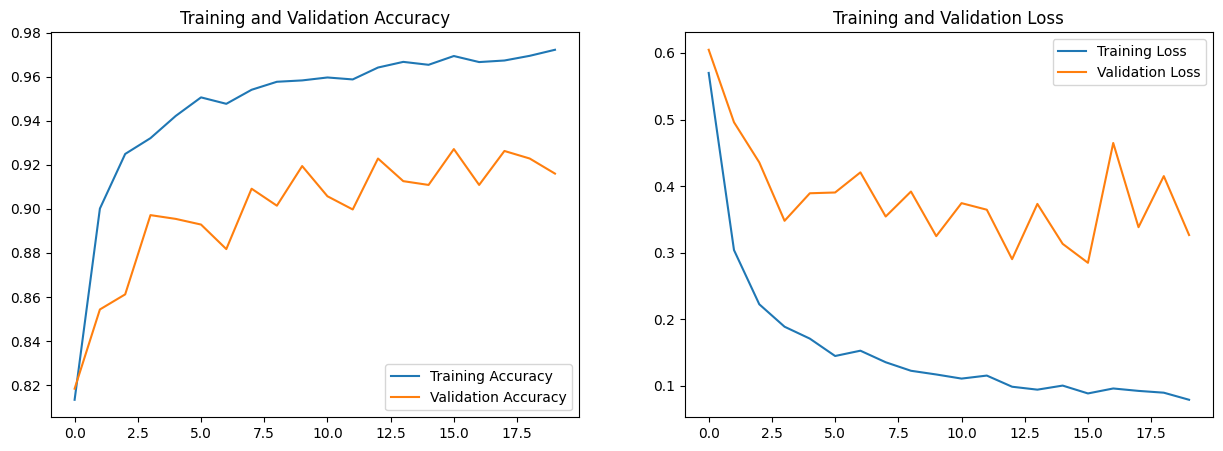

In [ ]:
# Plotting training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Saving the trained model
model.save("rice_disease_classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Define paths to your data
test_data_dir = "/content/drive/MyDrive/Dataset/Test Dataset"

# Define image dimensions
img_width, img_height = 224, 224

# Load your pre-trained DenseNet model
model = load_model("rice_disease_classifier.h5")

# Define data generators
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for testing sets
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

# Compile the model if not already compiled (optional)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Found 1322 images belonging to 14 classes.


In [ ]:
# Train the model for multiple epochs (adjust epochs as needed)
EPOCHS = 20
history = model.fit(
    test_generator,
    steps_per_epoch=len(test_generator),
    epochs=EPOCHS,
)

Epoch 1/20
42/42 [==============================] - 276s 6s/step - loss: 0.3358 - accuracy: 0.9191
Epoch 2/20
42/42 [==============================] - 23s 546ms/step - loss: 0.1801 - accuracy: 0.9455
Epoch 3/20
42/42 [==============================] - 25s 589ms/step - loss: 0.1269 - accuracy: 0.9531
Epoch 4/20
42/42 [==============================] - 25s 585ms/step - loss: 0.1129 - accuracy: 0.9629
Epoch 5/20
42/42 [==============================] - 25s 589ms/step - loss: 0.0808 - accuracy: 0.9697
Epoch 6/20
42/42 [==============================] - 24s 573ms/step - loss: 0.0650 - accuracy: 0.9720
Epoch 7/20
42/42 [==============================] - 25s 580ms/step - loss: 0.0636 - accuracy: 0.9811
Epoch 8/20
42/42 [==============================] - 25s 581ms/step - loss: 0.0529 - accuracy: 0.9826
Epoch 9/20
42/42 [==============================] - 24s 582ms/step - loss: 0.0505 - accuracy: 0.9864
Epoch 10/20
42/42 [==============================] - 25s 589ms/step - loss: 0.0363 - accuracy

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))

# Print the testing accuracy
print("Testing Accuracy:", test_acc)

42/42 [==============================] - 27s 603ms/step - loss: 0.0039 - accuracy: 0.9992
Testing Accuracy: 0.9992435574531555


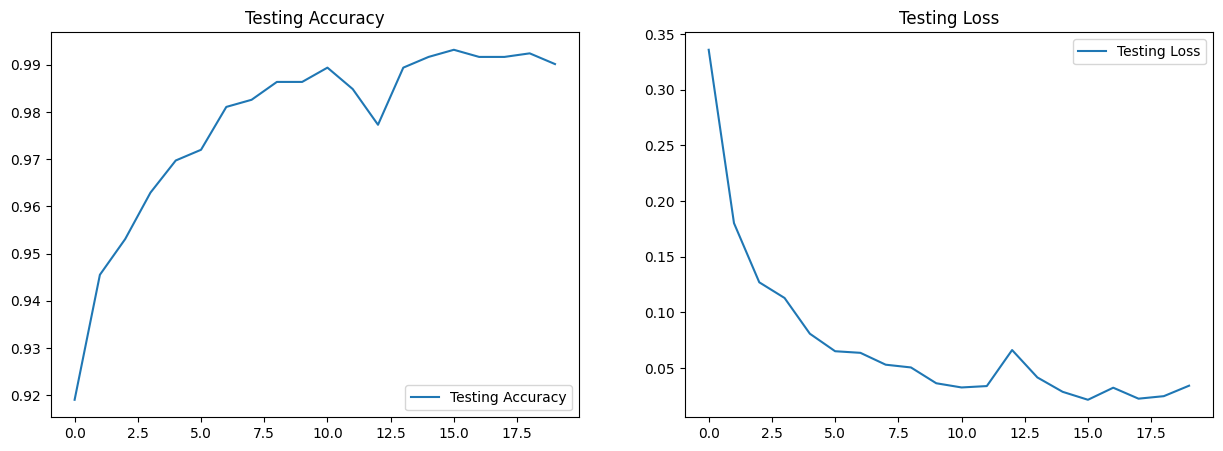

In [ ]:
# Plotting training and validation graphs
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Testing Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Testing Loss')
plt.show()